<a href="https://colab.research.google.com/github/sarakhaderkoko1233-wq/ML-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer

import seaborn as sns
aisles=pd.read_csv('/content/aisles.csv')
departments=pd.read_csv('/content/departments.csv')
prior=pd.read_csv('/content/order_products__prior.csv')
train=pd.read_csv('/content/order_products__train.csv')
orders = pd.read_csv('/content/orders.csv')
products=pd.read_csv('/content/products.csv')

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
#merging
data = train.merge(orders,on="order_id",how="left")
data = data.merge(products,on="product_id",how="left")
data = data.merge(aisles,on="aisle_id",how="left")
data = data.merge(departments,on="department_id",how="left")

In [ ]:
data.head()#done with data integration

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


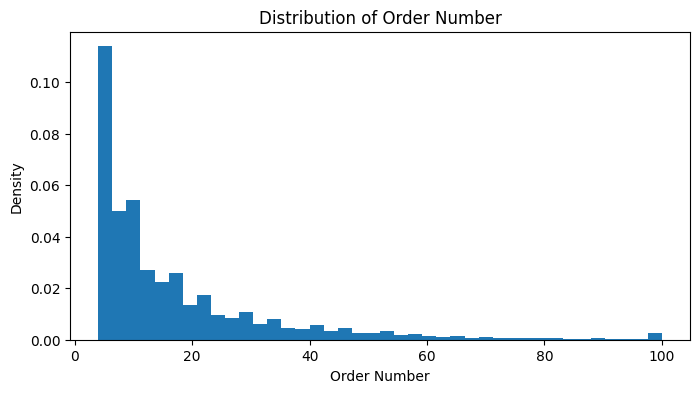

In [ ]:
#Most customers have a low number of orders, with a long tail representing highly loyal users
plt.figure(figsize=(8,4))
plt.hist(data['order_number'], bins=40, density=True)
plt.title('Distribution of Order Number')
plt.xlabel('Order Number')
plt.ylabel('Density')
plt.show()

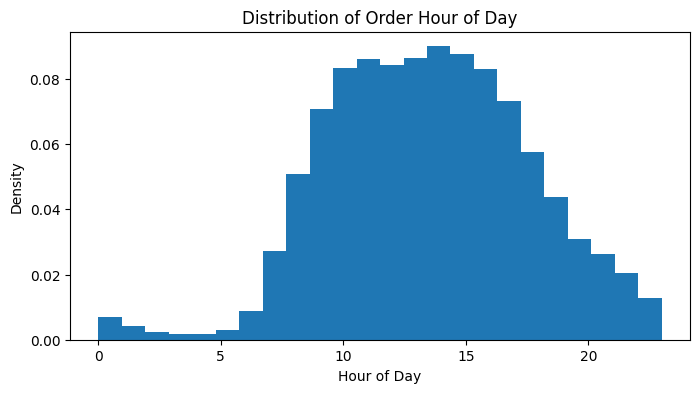

In [ ]:
plt.figure(figsize=(8,4))#Order activity peaking during daytime hours and significantly decreasing during late-night periods.
plt.hist(data['order_hour_of_day'], bins=24, density=True)
plt.title('Distribution of Order Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Density')
plt.show()

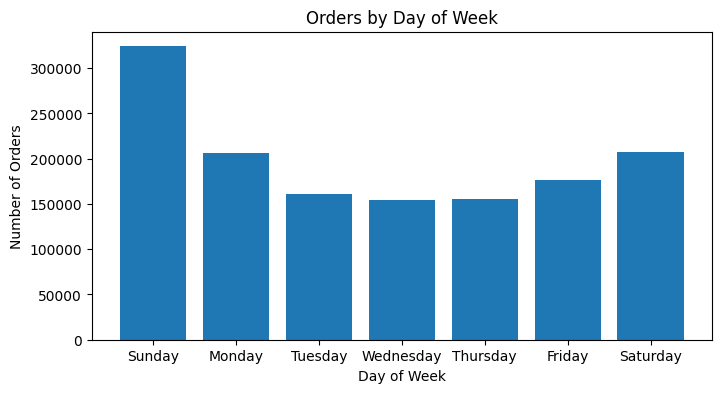

In [ ]:
#The distribution of orders across days of the week shows higher activity on specific days, particularly around the weekend.
dow_counts = data['order_dow'].value_counts().sort_index()

day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(8,4))
plt.bar(day_labels, dow_counts.values)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

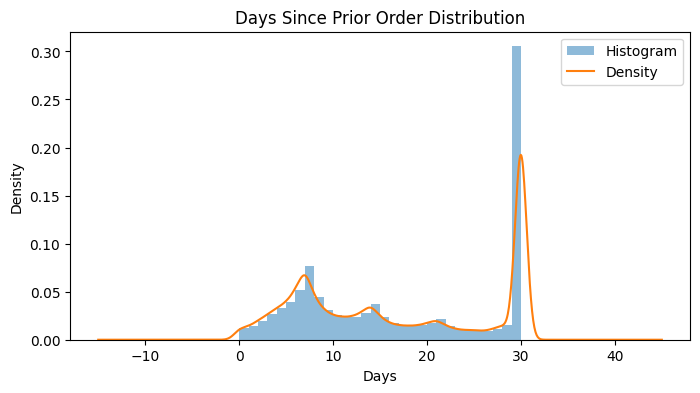

In [10]:
#The histogram shows the frequency distribution of days since the last order.
plt.figure(figsize=(8,4))
plt.hist(data['days_since_prior_order'], bins=30, density=True, alpha=0.5, label='Histogram')
data['days_since_prior_order'].plot(kind='kde', label='Density')
plt.title('Days Since Prior Order Distribution')
plt.xlabel('Days')
plt.ylabel('Density')
plt.legend()
plt.show()

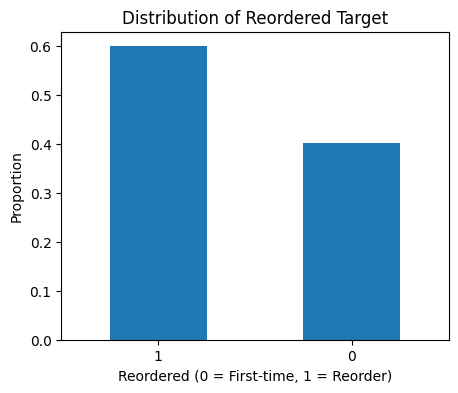

In [11]:
reorder_counts = data['reordered'].value_counts(normalize=True)

plt.figure(figsize=(5,4))
reorder_counts.plot(kind='bar')
plt.title('Distribution of Reordered Target')
plt.xlabel('Reordered (0 = First-time, 1 = Reorder)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [12]:
#Categorical cardinality analysis (barplots / top-k frequencies)
cat_cols = ['department_id', 'aisle_id', 'product_id']

for col in cat_cols:
    print(col, "unique values:", data[col].nunique())

department_id unique values: 21
aisle_id unique values: 134
product_id unique values: 39123


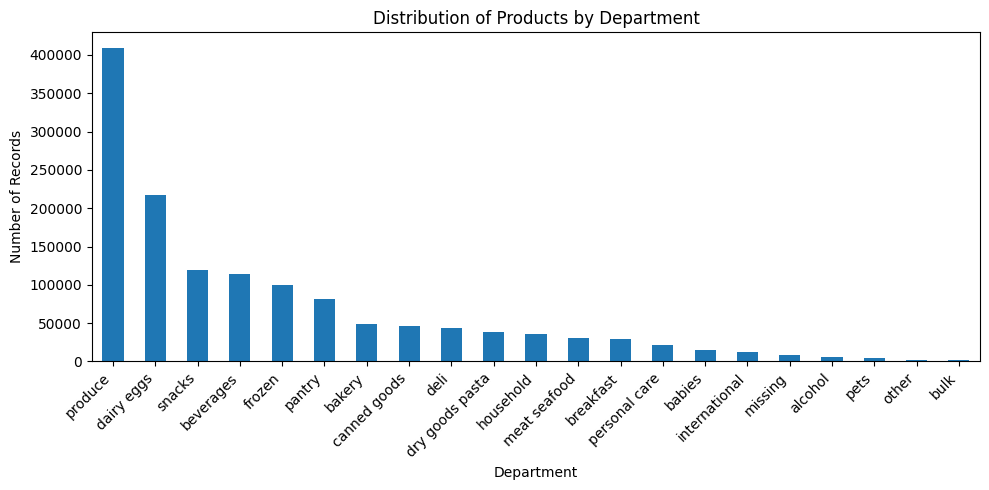

In [13]:
dept_counts = data['department'].value_counts()

plt.figure(figsize=(10,5))
dept_counts.plot(kind='bar')
plt.title('Distribution of Products by Department')
plt.xlabel('Department')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

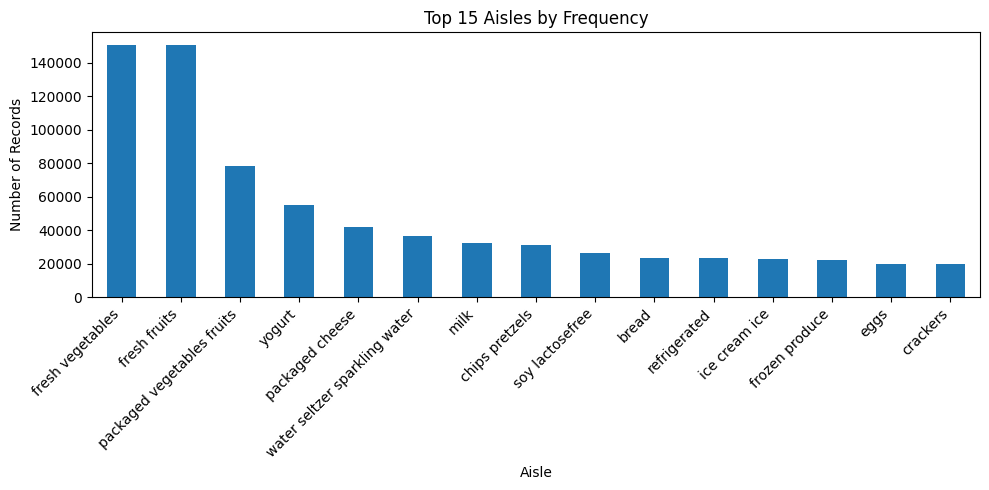

In [14]:
#Only the top 15 most frequent aisles are visualized to maintain clarity and highlight dominant shopping patterns
top_k = 15
aisle_counts = data['aisle'].value_counts().head(top_k)

plt.figure(figsize=(10,5))
aisle_counts.plot(kind='bar')
plt.title(f'Top {top_k} Aisles by Frequency')
plt.xlabel('Aisle')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

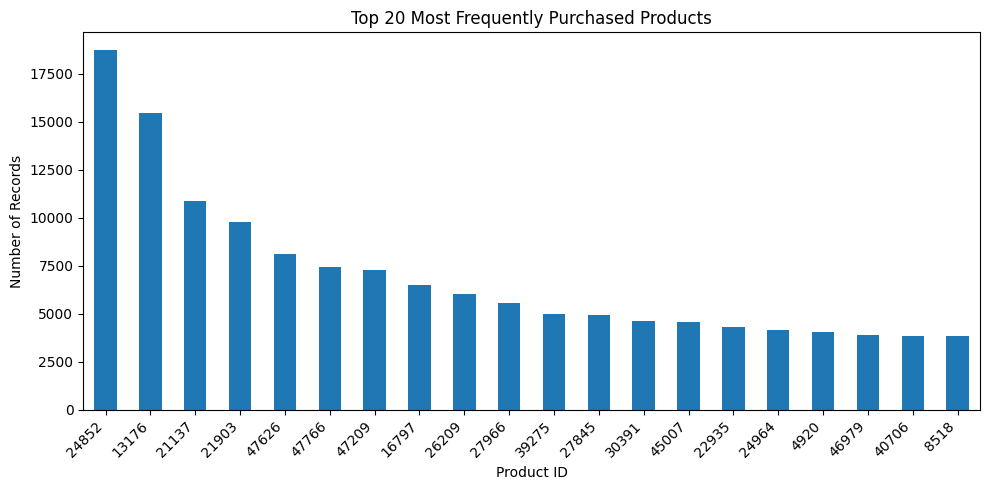

In [15]:
top_k = 20
product_counts = data['product_id'].value_counts().head(top_k)

plt.figure(figsize=(10,5))
product_counts.plot(kind='bar')
plt.title(f'Top {top_k} Most Frequently Purchased Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
numeric_features = ['order_number','order_hour_of_day','order_dow','days_since_prior_order','reordered']

data_numeric = data[numeric_features]

In [17]:
#correlation matrix
corr_matrix = data_numeric.corr()
corr_matrix

,order_number,order_hour_of_day,order_dow,days_since_prior_order,reordered
order_number,1.000000,-0.026567,0.024500,-0.403861,0.223947
order_hour_of_day,-0.026567,1.000000,0.005910,0.005184,-0.017840
order_dow,0.024500,0.005910,1.000000,-0.026765,-0.006714
days_since_prior_order,-0.403861,0.005184,-0.026765,1.000000,-0.160152
reordered,0.223947,-0.017840,-0.006714,-0.160152,1.000000


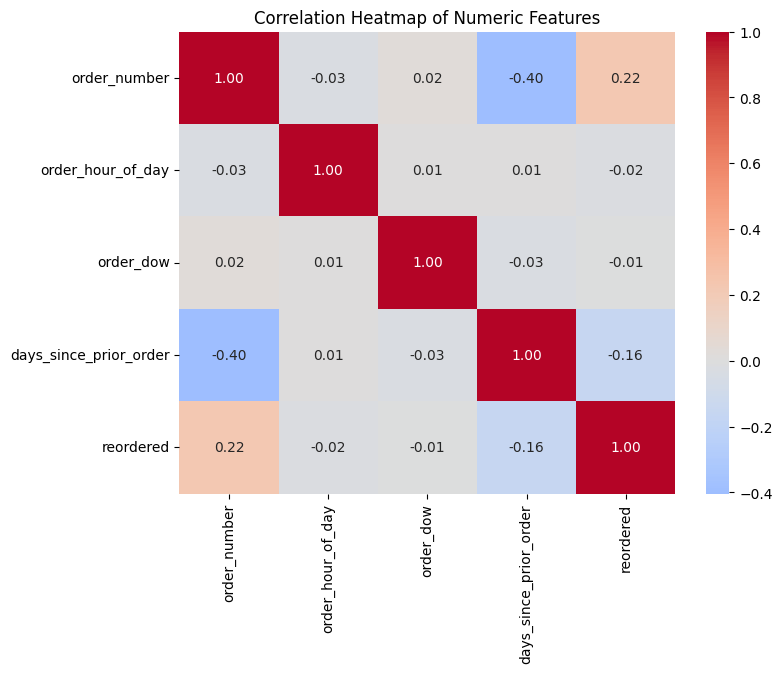

In [18]:
#The heatmap confirms generally weak linear correlations among numeric features
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [19]:
missing_data=data.isnull().sum()#checking for missing values
missing_data#Missing value analysis showed that the merged dataset contains no missing values across all features after integration, indicating successful joins and data consistency.

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0


In [20]:
#feature engineering
user_order=data.groupby('user_id').agg(user_order_count=('order_id','nunique')).reset_index()
user_items=data.groupby('user_id').agg(total_item_count=('product_id','nunique')).reset_index()
user_recorded=data[data['reordered']==1].groupby('user_id').agg(recorded_items_count=('reordered','sum')).reset_index()

user_features=user_order.merge(user_items,on='user_id',how='left')
user_features=user_features.merge(user_recorded,on='user_id',how='left')
user_features['recorded_items_count'] = user_features['recorded_items_count'].fillna(0)

user_features['basket_size']=user_features['total_item_count']/user_features['user_order_count']
user_features['reorder_rate']=user_features['recorded_items_count']/user_features['total_item_count']
user_features = user_features.fillna(0)

data['user_id']=data['user_id'].astype(int)
user_features['user_id']=user_features['user_id'].astype(int)

data=data.merge(user_features[['user_id','user_order_count','basket_size','reorder_rate']],on='user_id',how='left')
data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department,user_order_count,basket_size,reorder_rate
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs,1,8.0,0.5
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,1,8.0,0.5
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce,1,8.0,0.5
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce,1,8.0,0.5
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,1,8.0,0.5


In [25]:
# One-Hot Encoding for low-cardinality variables (aisle)
data_encoded = pd.get_dummies(data, columns=['aisle'])
data_encoded.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,1,49302,1,1,112108,train,4,4,10,9.0,...,False,False,False,False,False,False,False,False,False,True
1,1,11109,2,1,112108,train,4,4,10,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,10246,3,0,112108,train,4,4,10,9.0,...,False,False,False,False,False,False,False,False,False,False
3,1,49683,4,0,112108,train,4,4,10,9.0,...,False,False,False,False,False,False,False,False,False,False
4,1,43633,5,1,112108,train,4,4,10,9.0,...,False,False,False,False,False,False,False,False,False,False


In [26]:
data_encoded.dtypes

,0
order_id,int64
product_id,int64
add_to_cart_order,int64
reordered,int64
user_id,int64
...,...
aisle_trash bags liners,bool
aisle_vitamins supplements,bool
aisle_water seltzer sparkling water,bool
aisle_white wines,bool


In [27]:
X=data_encoded.drop(columns=['reordered', 'order_id','user_id','product_id','product_name','department','eval_set', 'aisle'], errors='ignore')
y=data_encoded['reordered']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, stratify=y, random_state=42)

In [29]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

Test Accuracy: 0.7787299042336525
train Accuracy: 0.7780422915013456
[[ 86304  24855]
 [ 36420 129345]]


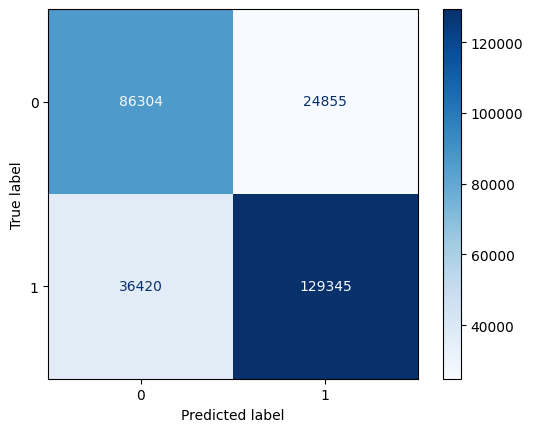

In [32]:
#logistic regression
model=LogisticRegression(C=1,penalty='l2',solver='lbfgs',class_weight='balanced',max_iter=2000)
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(f"Test Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"train Accuracy: {model.score(X_train_scaled,y_train)}")
cm_l=confusion_matrix(y_test,y_pred)
print(cm_l)
disp=ConfusionMatrixDisplay(cm_l, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

Test Accuracy: 0.7196
train Accuracy: 0.8464
[[ 7491  4495]
 [ 3917 14097]]


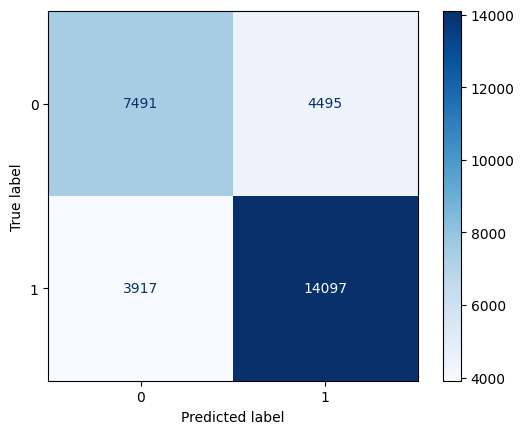

In [35]:
#K-Nearest Neighbors classifier
X_train_sample=X_train_scaled[:30000]
y_train_sample=y_train[:30000]
X_test_sample=X_test_scaled[:30000]
y_test_sample=y_test[:30000]
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sample,y_train_sample)
y_pred=knn.predict(X_test_sample)
print(f"Test Accuracy: {accuracy_score(y_test_sample,y_pred)}")
print(f"train Accuracy: {knn.score(X_train_sample,y_train_sample)}")
cm_k=confusion_matrix(y_test_sample,y_pred)
print(cm_k)
disp=ConfusionMatrixDisplay(cm_k, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Test Accuracy: 0.7175217749274169
train Accuracy: 1.0
[[ 72269  38997]
 [ 39228 126430]]


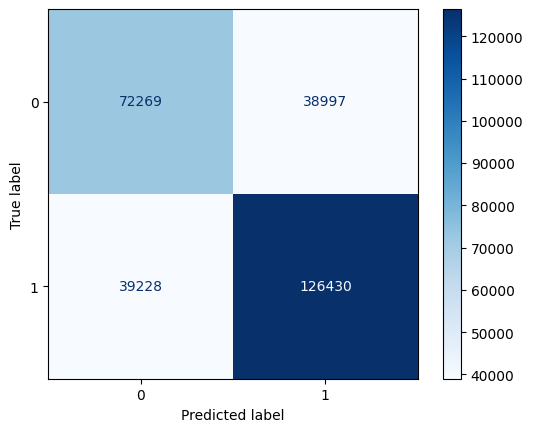

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"train Accuracy: {dt.score(X_train,y_train)}")
cm=confusion_matrix(y_test,y_pred)
print(cm)
disp=ConfusionMatrixDisplay(cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

plt.figure(figsize=(15,10))
plot_tree(dt,filled=True,feature_names=X.columns,class_names=['0','1'])
plt.title('desision tree visualization')
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
features = ['order_number', 'order_hour_of_day', 'order_dow', 'days_since_prior_order','product_id', 'user_id', 'department_id', 'aisle_id','add_to_cart_order', 'user_order_count', 'basket_size', 'reorder_rate']
X = data[features]
y = data['reordered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7886134823995031

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73    111266
           1       0.82      0.83      0.82    165658

    accuracy                           0.79    276924
   macro avg       0.78      0.78      0.78    276924
weighted avg       0.79      0.79      0.79    276924


Confusion Matrix:
 [[ 81061  30205]
 [ 28333 137325]]


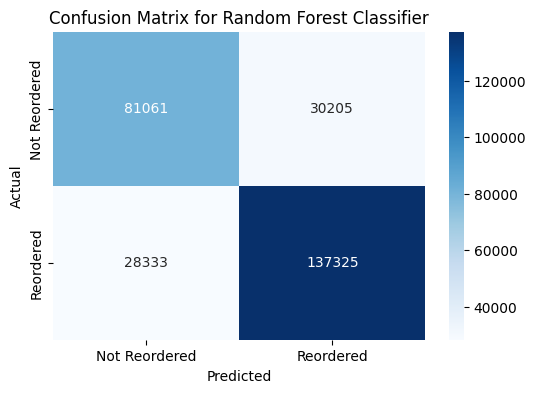

In [42]:
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Reordered', 'Reordered'], yticklabels=['Not Reordered', 'Reordered'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()